# Have to build customer segmentation dashboard
The winning apps will be judged according to the following categories:

* Ability to provide insight on the relationship between churn and customers’ characteristics
* App Design
* Data exploration and data analysis routines (e.g. numerical methods, machine learning, prediction, classification, optimization)

In [4]:
import pandas as pd 

In [5]:
data = pd.read_csv("telco-customer-churn-by-IBM.csv")

In [6]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7003,7004,7005,7006,7007,7008,7009,7010,7011,7012,7013,7014,7015,7016,7017,7018,7019,7020,7021,7022,7023,7024,7025,7026,7027,7028,7029,7030,7031,7032,7033,7034,7035,7036,7037,7038,7039,7040,7041,7042
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU,9305-CDSKC,1452-KIOVK,6713-OKOMC,7892-POOKP,6388-TABGU,9763-GRSKD,7469-LKBCI,8091-TTVAX,0280-XJGEX,5129-JLPIS,3655-SNQYZ,8191-XWSZG,9959-WOFKT,4190-MFLUW,4183-MYFRB,8779-QRDMV,1680-VDCWW,1066-JKSGK,3638-WEABW,6322-HRPFA,6865-JZNKO,6467-CHFZW,8665-UTDHZ,5248-YGIJN,8773-HHUOZ,3841-NFECX,4929-XIHVW,6827-IEAUQ,7310-EGVHZ,3413-BMNZE,6234-RAAPL,6047-YHPVI,6572-ADKRS,5380-WJKOV,8168-UQWWF,...,4501-VCPFK,6075-SLNIL,9347-AERRL,0093-XWZFY,2274-XUATA,1980-KXVPM,7703-ZEKEF,0723-DRCLG,5482-NUPNA,6691-CCIHA,1685-BQULA,9053-EJUNL,0666-UXTJO,1471-GIQKQ,4807-IZYOZ,1122-JWTJW,9710-NJERN,9837-FWLCH,1699-HPSBG,7203-OYKCT,1035-IPQPU,7398-LXGYX,2823-LKABH,8775-CEBBJ,0550-DCXLH,9281-CEDRU,2235-DWLJU,0871-OPBXW,3605-JISKB,6894-LFHLY,9767-FFLEM,0639-TSIQW,8456-QDAVC,7750-EYXWZ,2569-WGERO,6840-RESVB,2234-XADUH,4801-JZAZL,8361-LTMKD,3186-AJIEK
gender,Female,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Male,Male,Male,Female,Female,Male,Female,Female,Male,Male,Male,Female,Male,Female,Male,Male,Male,Female,Female,Male,Female,Male,Male,Female,Male,Female,Male,Female,...,Male,Male,Male,Male,Male,Female,Male,Female,Female,Female,Female,Male,Male,Female,Female,Male,Female,Male,Male,Male,Female,Male,Female,Female,Male,Female,Female,Female,Male,Male,Male,Female,Male,Female,Female,Male,Female,Female,Male,Male
SeniorCitizen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0
Partner,Yes,No,No,No,No,No,No,No,Yes,No,Yes,No,Yes,No,No,Yes,No,No,Yes,No,No,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,No,No,No,No,...,No,No,Yes,No,Yes,No,No,Yes,No,Yes,No,No,Yes,No,No,Yes,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,Yes,Yes,Yes,Yes,No
Dependents,No,No,No,No,No,No,Yes,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,Yes,No,No,Yes,No,No,Yes,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,Yes,Yes,No,No
tenure,1,34,2,45,2,8,22,10,28,62,13,16,58,49,25,69,52,71,10,21,1,12,1,58,49,30,47,1,72,17,71,2,27,1,1,72,5,46,34,11,...,26,38,23,40,72,3,23,1,4,62,40,41,34,1,51,1,39,12,12,72,63,44,18,9,13,68,6,2,55,1,38,67,19,12,72,24,72,11,4,66
PhoneService,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes
MultipleLines,No phone service,No,No,No phone service,No,Yes,Yes,No phone service,Yes,No,No,No,Yes,Yes,No,Yes,No,Yes,No,No,No phone service,No,No,Yes,No,No,Yes,No phone service,Yes,No,Yes,No,No,No,No,Yes,No,No,Yes,Yes,...,No phone service,Yes,No,Yes,No phone service,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,No,Yes,Yes,Yes,Yes,No,No,No,No phone service,No,Yes,Yes,No,Yes,No,No phone service,No,Yes,Yes,No phone service,Yes,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,Fiber optic,DSL,DSL,No,Fiber optic,Fiber optic,Fiber optic,Fiber optic,No,Fiber optic,DSL,Fiber optic,DSL,No,No,DSL,DSL,DSL,Fiber optic,DSL,DSL,DSL,Fiber optic,Fiber optic,DSL,No,DSL,Fiber optic,Fiber optic,Fiber optic,Fiber optic,Fiber optic,...,DSL,Fiber optic,No,Fiber optic,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,DSL,Fiber optic,Fiber optic,Fiber optic,DSL,No,Fiber optic,No,No,DSL,Fiber optic,Fiber optic,Fiber optic,Fiber optic,DSL,DSL,DSL,DSL,No,DSL,Fiber optic,Fiber optic,Fiber optic,Fiber optic,DSL,N

In [8]:
import skimpy

In [9]:
skimpy.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 7043   │ │ string      │ 18    │                                                          │
│ │ Number of columns │ 21     │ │ int64       │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ SeniorCitizen          │    0 │       0 │    0.16 │    0.37 │    0 │      0 │      0 │       1 │  █    ▂   │  │
│ │ tenure                 │    0 │       0 │      32 │      25 │    0 │      9 │     55 │      72 │  █▄▃▃▃▆   │  │
│ │ MonthlyCharges         │    0 │       0 │      65 │      30 │   18 │     36 │     90 │     120 │  █▃▄▇▇▃   │  │
│ └────────────────────────┴──────┴─────────┴─────────┴─────────┴──────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                      ┃ NA     ┃ NA %      ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ customerID                       │      0 │         0 │                          1 │                  7000 │  │
│ │ gender                           │      0 │         0 │                          1 │                  7000 │  │
│ │ Partner                          │      0 │         0 │                          1 │                  7000 │  │
│ │ Dependents                       │      0 │         0 │                          1 │                  7000 │  │
│ │ PhoneService                     │      0 │         0 │                          1 │                  7000 │  │
│ │ MultipleLines                    │      0 │         0 │                          1 │                  7000 │  │
│ │ InternetService                  │      0 │         0 │                          1 │                  7000 │  │
│ │ OnlineSecurity                   │      0 │         0 │                          1 │                  7000 │  │
│ │ OnlineBackup                     │      0 │         0 │                          1 │                  7000 │  │
│ │ DeviceProtection                 │      0 │         0 │                          1 │                  7000 │  │
│ │ TechSupport                      │      0 │         0 │                          1 │                  7000 │  │
│ │ StreamingTV                      │      0 │         0 │                          1 │                  7000 │  │
│ │ StreamingMovies                  │      0 │         0 │                          1 │                  7000 │  │
│ │ Contract                         │      0 │         

In [10]:
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: Int64

# Establishing the relationship between churn and other columns 

```
Churn Yes: the customer left the company. 
Churn No: the customer didn't remained with company.
```

In [11]:
import plotly.express as px 

In [12]:
px.histogram(data, x="Churn", color = "gender", title = "Customer churn and gender distribution", 
            template = "plotly_dark", barmode = "group")

In [13]:
px.histogram(data, x="Churn", color = "SeniorCitizen", title = "Customer churn and senior citizen distribution",
template = "plotly_dark", barmode = "group")

In [14]:
data.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: Int64

In [15]:
px.histogram(data, x = "PaymentMethod" , color = "Churn", title = "Customer churn and payment method distribution",
template = "plotly_dark", barmode = "group")    

In [16]:
print("hell")

hell


In [17]:
from pycaret.classification import *

In [18]:
# initializing the project 
data = pd.read_csv("telco-customer-churn-by-IBM.csv")
data = data.drop(columns = ["customerID"])
data = data.dropna()
data = data.reset_index(drop = True)
data = data.drop_duplicates()


In [19]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [22]:
# initializing the project 
exp_clf = setup(data = data, target = 'Churn', session_id = 123, normalize = True,
                transformation = True)
                

<frozen importlib._bootstrap>:241: RuntimeWarning:

numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject

/home/somesh/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/somesh/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/somesh/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/somesh/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

/home/somesh/.local/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarni

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7021, 20)"
5,Transformed data shape,"(7021, 41)"
6,Transformed train set shape,"(4914, 41)"
7,Transformed test set shape,"(2107, 41)"
8,Ordinal features,5
9,Numeric features,3


In [23]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8075,0.8407,0.5238,0.6762,0.5893,0.4664,0.4735,1.9410
ridge,Ridge Classifier,0.8040,0.0000,0.4877,0.6824,0.5674,0.4455,0.4568,0.4070
ada,Ada Boost Classifier,0.8036,0.8394,0.5238,0.6653,0.5847,0.4587,0.4652,0.5800
lda,Linear Discriminant Analysis,0.8026,0.8366,0.5323,0.6567,0.5865,0.4591,0.4643,0.5060
gbc,Gradient Boosting Classifier,0.8020,0.8410,0.5108,0.6634,0.5760,0.4500,0.4571,0.7890
catboost,CatBoost Classifier,0.7991,0.8369,0.5046,0.6579,0.5694,0.4418,0.4493,3.9810
lightgbm,Light Gradient Boosting Machine,0.7932,0.8278,0.5031,0.6388,0.5613,0.4290,0.4351,0.5270
xgboost,Extreme Gradient Boosting,0.7873,0.8164,0.5177,0.6165,0.5617,0.4230,0.4265,0.9330
rf,Random Forest Classifier,0.7849,0.8065,0.4585,0.6279,0.5287,0.3942,0.4029,0.7340
svm,SVM - Linear Kernel,0.7692,0.0000,0.5400,0.5786,0.5476,0.3953,0.4024,0.4040


In [24]:
tuned_model = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8089,0.8472,0.5769,0.6579,0.6148,0.4885,0.4903
1,0.8028,0.8290,0.4615,0.6897,0.5530,0.4328,0.4472
2,0.8110,0.8390,0.5385,0.6796,0.6009,0.4792,0.4848
3,0.8272,0.8516,0.5538,0.7273,0.6288,0.5189,0.5271
4,0.8045,0.8537,0.4846,0.6848,0.5676,0.4460,0.4571
5,0.7882,0.8162,0.4769,0.6327,0.5439,0.4094,0.4164
6,0.8187,0.8689,0.5769,0.6881,0.6276,0.5090,0.5125
7,0.8065,0.8187,0.5462,0.6636,0.5992,0.4732,0.4771
8,0.7984,0.8297,0.4769,0.6667,0.5561,0.4302,0.4403


Fitting 10 folds for each of 10 candidates, totalling 100 fits


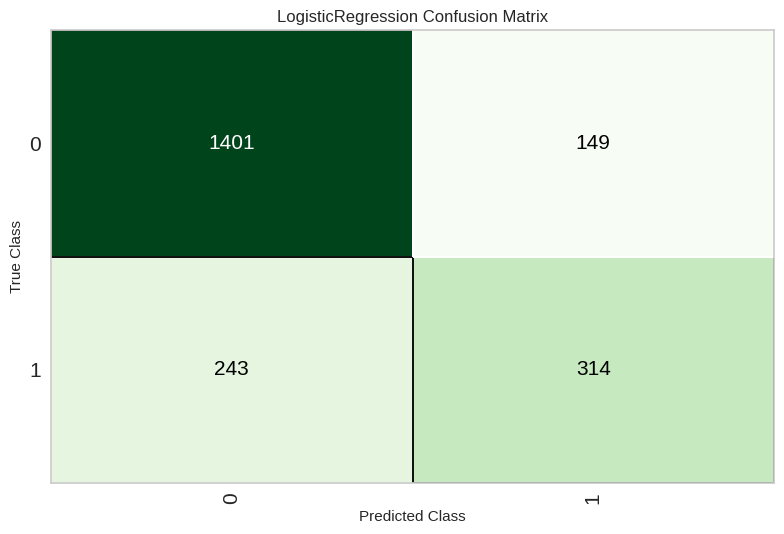

In [25]:
plot_model(tuned_model, plot = "confusion_matrix")

In [26]:
save_model(tuned_model, "lr_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=/tmp/joblib),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['SeniorCitizen', 'tenure',
                                              'MonthlyCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               missing_values=nan...
                  TransformerWrapper(exclude=None, include=None,
                                     transformer=StandardScaler(copy=True,
                                                                with_mea

In [27]:
data.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


In [34]:
tuned_model.predict_proba(data.head(1))

/home/somesh/.local/lib/python3.10/site-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Churn
- Contract
- DeviceProtection
- InternetService
- MultipleLines
- ...
Feature names seen at fit time, yet now missing:
- Contract_Month-to-month
- Contract_One year
- Contract_Two year
- DeviceProtection_No
- DeviceProtection_No internet service
- ...




ValueError: could not convert string to float: 'Female'

In [35]:
predict_model(tuned_model, data = data.head(1))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.0000,0,0,0,0,0.0000,0.0000


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines_No phone service,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineBackup_No,OnlineBackup_Yes,OnlineBackup_No internet service,DeviceProtection_No,DeviceProtection_Yes,DeviceProtection_No internet service,TechSupport_No,TechSupport_Yes,TechSupport_No internet service,StreamingTV_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingMovies_No,StreamingMovies_Yes,StreamingMovies_No internet service,Contract_Month-to-month,Contract_Two year,Contract_One year,PaperlessBilling,PaymentMethod_Bank transfer (automatic),PaymentMethod_Electronic check,PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
0,-1.012285,-0.446886,1.039019,-0.659034,-1.662876,-3.057002,3.057002,-0.971509,-0.847102,1.370669,-0.883787,-0.521917,-0.636241,1.004487,-0.521917,-0.884884,1.372517,-0.521917,1.138535,-0.734489,-0.521917,1.008994,-0.639714,-0.521917,-0.78989,1.220394,-0.521917,1.229222,-0.795676,-0.521917,0.903679,-0.564346,-0.512435,0.819754,-0.543012,1.413566,-0.525703,-0.534522,-1.162551,0.03225,No,Yes,0.6793
